In [57]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
sales_data = pd.read_csv('Auto Sales data.csv')


## Project Purpose

### The purpose of the project is to:

#### Analyze Sales Performance:

Uncover patterns and trends in historical sales data.

Assess the impact of deal sizes and other factors on sales revenue.

#### Develop Predictive Insights:

Build a linear regression model to predict future sales based on key features (QUANTITYORDERED, PRICEEACH).

Enable data-driven forecasting for inventory management and revenue planning.

#### Provide Decision Support:

Deliver insights to stakeholders through a predictive dataset exported for Power BI, facilitating visualization and strategic decision-making.

### Dataset Summary

The dataset contains 2,747 records of automobile sales data, detailing transaction-level information such as:

Order details: ORDERNUMBER, ORDERDATE, QUANTITYORDERED, and PRICEEACH.

Financial metrics: SALES (target variable), MSRP.

Categorical details: DEALSIZE, STATUS, PRODUCTLINE, and customer information (CITY, COUNTRY, etc.).

Date and Time: ORDERDATE, enabling time-based analysis.
The dataset provides a comprehensive view of sales transactions, allowing analysis of sales patterns, customer behaviors, and other factors impacting performance.

### Intended KPIs

#### Key Performance Indicators (KPIs) include:

#### Total Sales:
Overall revenue across transactions.

Aggregated by time periods (e.g., yearly, monthly).

#### Average Sales per Order:

Mean revenue per transaction to gauge order profitability.

#### Sales by Deal Size:

Comparing revenue contributions across deal sizes (Small, Medium, Large).

#### Sales Trends:

Identifying seasonal or yearly variations in sales patterns.

#### Predictive Accuracy:

Model evaluation metrics like R-squared and Mean Squared Error (MSE) to assess the quality of the regression model.


In [15]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

### Data cleaning and preparation

In [16]:
# Data cleaning and preparation
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'], format='%d/%m/%Y')  # Convert to datetime
sales_data.dropna(inplace=True)  # Drop rows with missing values


In [17]:
sales_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,2019-05-13 21:56:17.211503360,1757.085912,100.691664
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,2018-11-08 00:00:00,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,2019-06-24 00:00:00,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2019-11-17 00:00:00,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,2020-05-31 00:00:00,3562.000000,214.000000
std,91.877521,9.762135,42.042549,4.230544,1838.953901,NaN,819.280576,40.114802


# EDA

### 1. Sales distribution

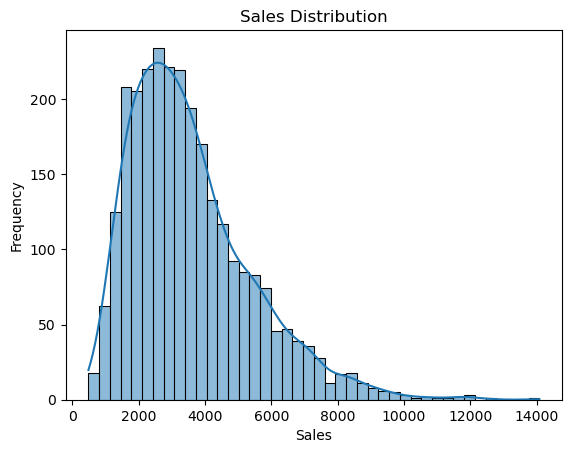

In [20]:
# EDA


sns.histplot(sales_data['SALES'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

### 2. Deal Size Analysis

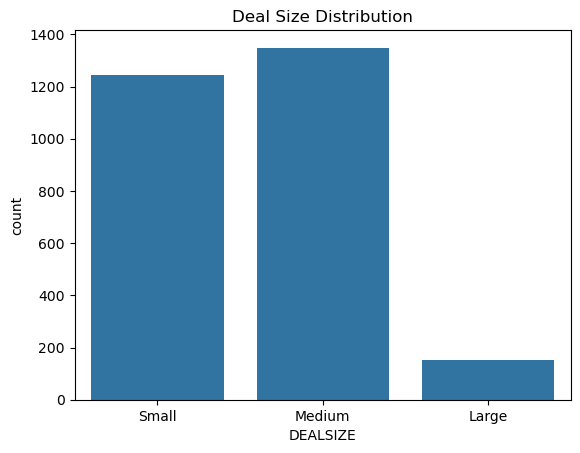

In [21]:

sns.countplot(x='DEALSIZE', data=sales_data)
plt.title('Deal Size Distribution')
plt.show()

### 3. Sales trends over time

In [22]:

sales_data['YEAR'] = sales_data['ORDERDATE'].dt.year
monthly_sales = sales_data.groupby(sales_data['ORDERDATE'].dt.to_period('M'))['SALES'].sum()


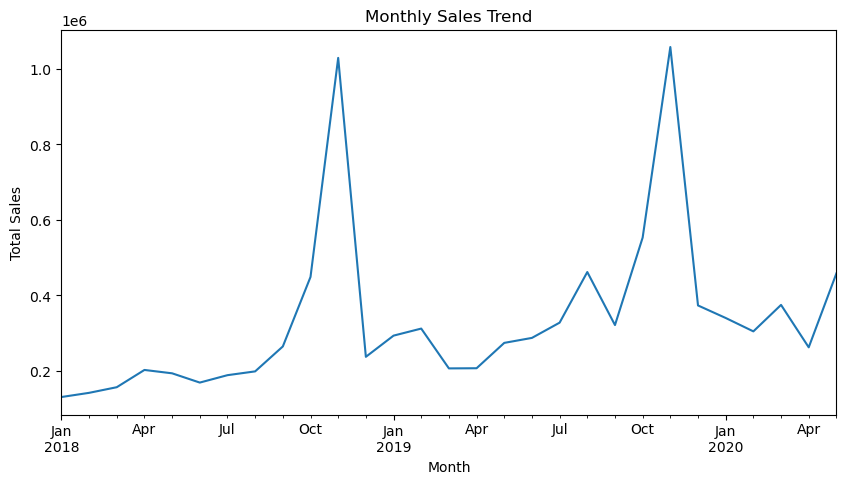

In [23]:
monthly_sales.plot(kind='line', figsize=(10, 5))
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()


## Univariate Analysis

Summary Statistics:
              SALES  QUANTITYORDERED    PRICEEACH
count   2747.000000      2747.000000  2747.000000
mean    3553.047583        35.103021   101.098952
std     1838.953901         9.762135    42.042549
min      482.130000         6.000000    26.880000
25%     2204.350000        27.000000    68.745000
50%     3184.800000        35.000000    95.550000
75%     4503.095000        43.000000   127.100000
max    14082.800000        97.000000   252.870000


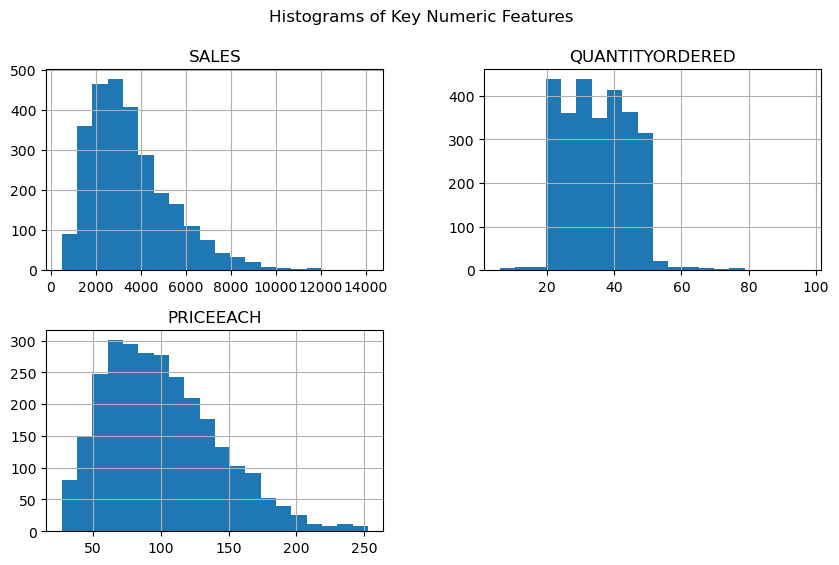

In [26]:


# 1. Summary statistics
print("Summary Statistics:")
print(sales_data[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].describe())

# 2. Histograms
sales_data[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].hist(bins=20, figsize=(10, 6))
plt.suptitle("Histograms of Key Numeric Features")
plt.show()


Deal Size Counts:
DEALSIZE
Medium    1349
Small     1246
Large      152
Name: count, dtype: int64


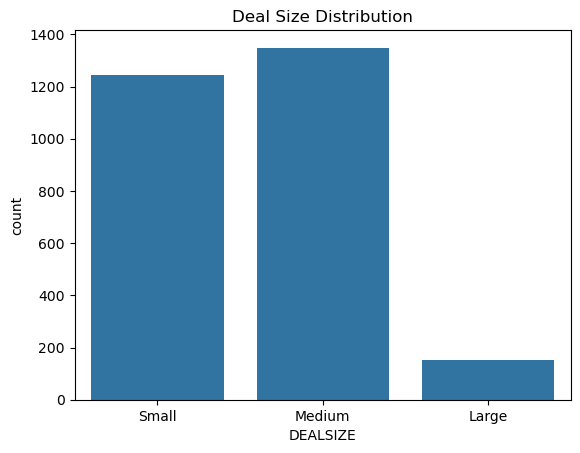

In [27]:
# 3. Counts for categorical columns
print("Deal Size Counts:")
print(sales_data['DEALSIZE'].value_counts())

sns.countplot(x='DEALSIZE', data=sales_data)
plt.title('Deal Size Distribution')
plt.show()


## Bivariate Analysis

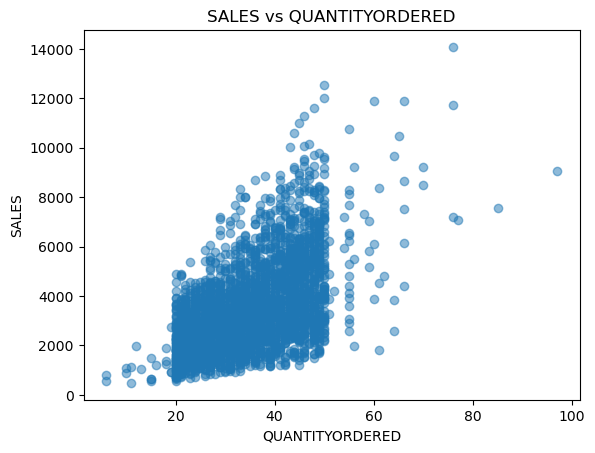

In [29]:
# 1. Scatter plot between SALES and QUANTITYORDERED
plt.scatter(sales_data['QUANTITYORDERED'], sales_data['SALES'], alpha=0.5)
plt.title('SALES vs QUANTITYORDERED')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.show()

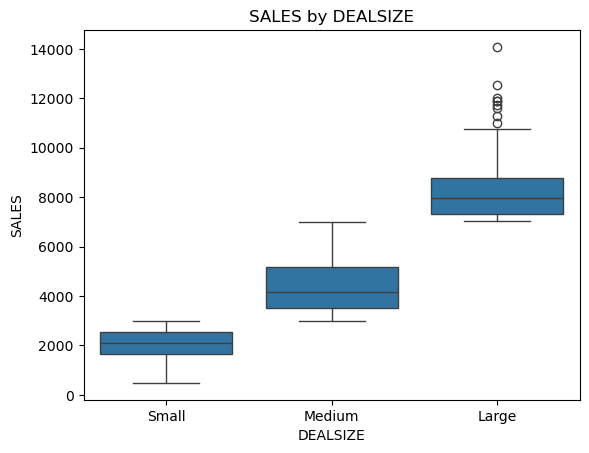

In [30]:

# 3. Box Plot: SALES by DEALSIZE
sns.boxplot(x='DEALSIZE', y='SALES', data=sales_data)
plt.title('SALES by DEALSIZE')
plt.show()

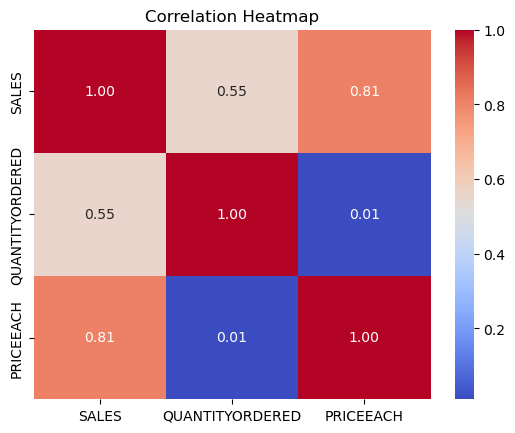

In [31]:
# Correlation Heatmap
correlation = sales_data[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Grouped Analysis: SALES by YEAR and DEALSIZE

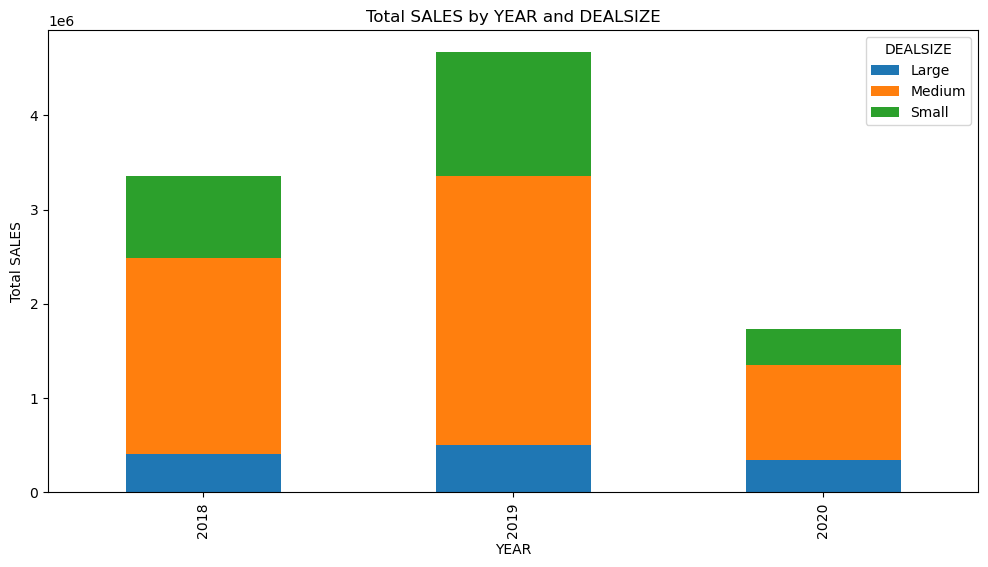

In [33]:

grouped_sales = sales_data.groupby(['YEAR', 'DEALSIZE'])['SALES'].sum().unstack()
grouped_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total SALES by YEAR and DEALSIZE')
plt.xlabel('YEAR')
plt.ylabel('Total SALES')
plt.legend(title='DEALSIZE')
plt.show()

# Linear regression implementation

In [34]:
# Feature selection and target variable

X = sales_data[['QUANTITYORDERED', 'PRICEEACH']]  # Features
y = sales_data['SALES']  # Target


In [35]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:

# Normalize the feature data
scaler = StandardScaler()  # Initialize scaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data

In [36]:
# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [40]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 168733.09217564994
R-squared: 0.9446475636950751


In [41]:

# Regression equation
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: -3624.1334730093704
Coefficients: [102.93749761  35.27261532]


In [48]:

# Save predictions
sales_data['Predicted_Sales'] = model.predict(X)
sales_data.to_csv('predicted_sales_data.csv', index=False)

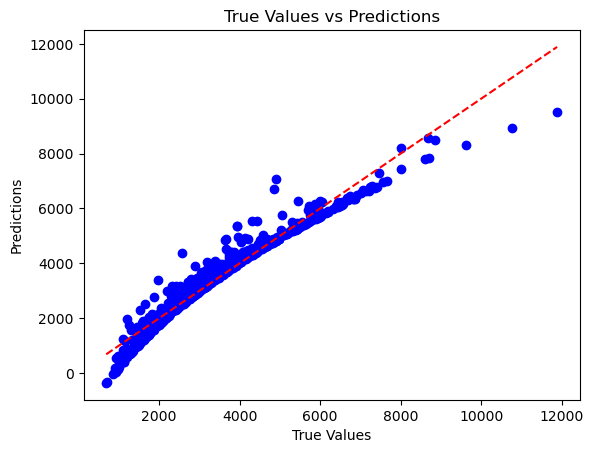

In [49]:

# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

### How to Interpret

#### Mean Squared Error (MSE):

Represents the average squared difference between predicted and actual values.
Lower values indicate better model performance.

#### R-squared (R²):

Explains the proportion of variance in the target variable (SALES) that is explained by the features.
Higher values (closer to 1) indicate a better fit.

#### Coefficients:

Indicate the strength and direction of the relationship between each feature and the target variable.
Positive coefficients imply a direct relationship, while negative coefficients imply an inverse relationship.

#### Intercept:

Represents the predicted value of the target variable when all feature values are zero.
